In [8]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import os
import pandas as pd

# Changer le répertoire courant
os.chdir(r"C:\Users\yacin\Desktop\DATA SCIENCE OPENCLASSROOMS\Projet 8 MLOPS2\datasets")

# Afficher les fichiers pour vérifier
print(os.listdir())

['test_final.csv', 'train_final.csv']


In [10]:
train_final = pd.read_csv("train_final.csv")

In [11]:
test_final = pd.read_csv("test_final.csv")

In [17]:
train_final.shape

(307511, 598)

In [18]:
test_final.shape

(48744, 597)

In [ ]:
from sklearn.model_selection import train_test_split

X = train_final.drop(columns=["TARGET"])
y = train_final["TARGET"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Fusion des données 

In [22]:
def aggregate_and_merge(main_df, df_to_agg, main_key, agg_key, prefix):
    """
    Agrège les colonnes numériques de df_to_agg par agg_key
    et fusionne le résultat à main_df via main_key.
    """
    # Garder uniquement les colonnes numériques
    numeric_df = df_to_agg.select_dtypes(include=['number']).copy()

    # Ajouter la clé si absente
    if agg_key not in numeric_df.columns:
        numeric_df[agg_key] = df_to_agg[agg_key]

    # Aggrégation
    agg_funcs = ['count', 'mean', 'max', 'min', 'sum']
    agg_df = numeric_df.groupby(agg_key).agg(agg_funcs)

    # Renommage des colonnes
    agg_df.columns = [f"{prefix}_{col[0]}_{col[1]}" for col in agg_df.columns]
    agg_df.reset_index(inplace=True)

    # Fusion avec suppression éventuelle de la clé
    merged_df = main_df.merge(agg_df, how='left', left_on=main_key, right_on=agg_key)
    if agg_key in merged_df.columns and agg_key != main_key:
        merged_df.drop(columns=agg_key, inplace=True)

    return merged_df


In [23]:
# Étape 1 : Bureau balance → bureau
bur = aggregate_and_merge(bur, bur_bal, 'SK_ID_BUREAU', 'SK_ID_BUREAU', 'BUREAU_BAL')

In [24]:
# Étape 2 : Bureau → application
app_train = aggregate_and_merge(app_train, bur, 'SK_ID_CURR', 'SK_ID_CURR', 'BUREAU')
app_test = aggregate_and_merge(app_test, bur, 'SK_ID_CURR', 'SK_ID_CURR', 'BUREAU')

In [25]:
# Étape 3 : Previous application → application
app_train = aggregate_and_merge(app_train, prev_app, 'SK_ID_CURR', 'SK_ID_CURR', 'PREV')
app_test = aggregate_and_merge(app_test, prev_app, 'SK_ID_CURR', 'SK_ID_CURR', 'PREV')

In [26]:
# Étape 4 : POS_CASH_balance → application
app_train = aggregate_and_merge(app_train, poscash_bal, 'SK_ID_CURR', 'SK_ID_CURR', 'POS')
app_test = aggregate_and_merge(app_test, poscash_bal, 'SK_ID_CURR', 'SK_ID_CURR', 'POS')

In [27]:
# Étape 5 : Credit card balance → application
app_train = aggregate_and_merge(app_train, crecard_bal, 'SK_ID_CURR', 'SK_ID_CURR', 'CRECARD')
app_test = aggregate_and_merge(app_test, crecard_bal, 'SK_ID_CURR', 'SK_ID_CURR', 'CRECARD')

In [28]:
# Étape 6 : Installments payments → application
app_train = aggregate_and_merge(app_train, inst_pay, 'SK_ID_CURR', 'SK_ID_CURR', 'INSTALL')
app_test = aggregate_and_merge(app_test, inst_pay, 'SK_ID_CURR', 'SK_ID_CURR', 'INSTALL')

In [29]:
app_train.shape

(307511, 482)

In [30]:
app_test.shape

(48744, 481)

In [35]:
import os
print(os.getcwd())

C:\Users\yacin\Desktop\DATA SCIENCE OPENCLASSROOMS\Projet 6 MLOPS\DATASETP6


In [ ]:
# 1. Sauvegarder les fichiers localement
app_train.to_csv("app_train.csv", index=False)
app_test.to_csv("app_test.csv", index=False)

## Exploration du df fusionné

In [31]:
missing_values_table(app_train)

Your selected dataframe has 482 columns.
There are 427 columns that have missing values.


,Missing Values,% of Total Values
PREV_RATE_INTEREST_PRIMARY_min,302902,98.5
PREV_RATE_INTEREST_PRIVILEGED_min,302902,98.5
PREV_RATE_INTEREST_PRIMARY_mean,302902,98.5
PREV_RATE_INTEREST_PRIVILEGED_mean,302902,98.5
PREV_RATE_INTEREST_PRIVILEGED_max,302902,98.5
...,...,...
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0


In [32]:
missing_values_table(app_test)

Your selected dataframe has 481 columns.
There are 424 columns that have missing values.


,Missing Values,% of Total Values
PREV_RATE_INTEREST_PRIVILEGED_min,47632,97.7
PREV_RATE_INTEREST_PRIVILEGED_max,47632,97.7
PREV_RATE_INTEREST_PRIMARY_max,47632,97.7
PREV_RATE_INTEREST_PRIMARY_mean,47632,97.7
PREV_RATE_INTEREST_PRIVILEGED_mean,47632,97.7
...,...,...
OBS_60_CNT_SOCIAL_CIRCLE,29,0.1
DEF_30_CNT_SOCIAL_CIRCLE,29,0.1
OBS_30_CNT_SOCIAL_CIRCLE,29,0.1
AMT_ANNUITY,24,0.0


In [33]:
app_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [34]:
app_train.dtypes.value_counts()

float64    425
int64       41
object      16
Name: count, dtype: int64

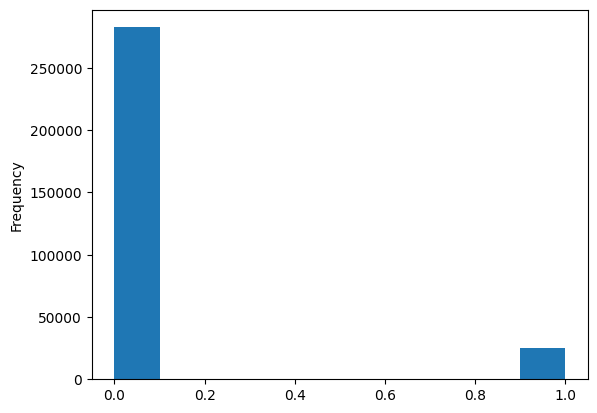

In [35]:
app_train['TARGET'].astype(int).plot.hist();

In [36]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [37]:
# Pourcentage de valeurs manquantes dans chaque colonne
missing_percent = app_train.isnull().mean() * 100

# Colonnes avec plus de 90% de NaN
high_na_columns = missing_percent[missing_percent > 80].sort_values(ascending=False)

# Affichage
print("Colonnes avec plus de 85% de valeurs manquantes :")
print(high_na_columns)


Colonnes avec plus de 85% de valeurs manquantes :
PREV_RATE_INTEREST_PRIMARY_mean            98.501192
PREV_RATE_INTEREST_PRIMARY_max             98.501192
PREV_RATE_INTEREST_PRIMARY_min             98.501192
PREV_RATE_INTEREST_PRIVILEGED_mean         98.501192
PREV_RATE_INTEREST_PRIVILEGED_max          98.501192
PREV_RATE_INTEREST_PRIVILEGED_min          98.501192
CRECARD_AMT_PAYMENT_CURRENT_max            80.143800
CRECARD_AMT_PAYMENT_CURRENT_min            80.143800
CRECARD_AMT_PAYMENT_CURRENT_mean           80.143800
CRECARD_AMT_DRAWINGS_ATM_CURRENT_max       80.117784
CRECARD_AMT_DRAWINGS_ATM_CURRENT_mean      80.117784
CRECARD_AMT_DRAWINGS_OTHER_CURRENT_max     80.117784
CRECARD_AMT_DRAWINGS_OTHER_CURRENT_mean    80.117784
CRECARD_AMT_DRAWINGS_ATM_CURRENT_min       80.117784
CRECARD_AMT_DRAWINGS_OTHER_CURRENT_min     80.117784
CRECARD_AMT_DRAWINGS_POS_CURRENT_min       80.117784
CRECARD_AMT_DRAWINGS_POS_CURRENT_max       80.117784
CRECARD_AMT_DRAWINGS_POS_CURRENT_mean      80.117

In [38]:
# Supprimer toutes les colonnes avec plus de 90 % de NaN
app_train = app_train.loc[:, app_train.isnull().mean() < 0.90]
app_test = app_test.loc[:, app_test.isnull().mean() < 0.90]

In [39]:
app_train.shape

(307511, 476)

## Encodage des variables et alignement

In [40]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [41]:
# one-hot encoding of categorical variables
app_train2 = pd.get_dummies(app_train)
app_test2 = pd.get_dummies(app_test)

print('Training Features shape: ', app_train2.shape)
print('Testing Features shape: ', app_test2.shape)

Training Features shape:  (307511, 597)
Testing Features shape:  (48744, 593)


In [42]:
train_labels = app_train2['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train2, app_test2 = app_train2.align(app_test2, join = 'inner', axis = 1)

# Add the target back in
app_train2['TARGET'] = train_labels

print('Training Features shape: ', app_train2.shape)
print('Testing Features shape: ', app_test2.shape)

Training Features shape:  (307511, 594)
Testing Features shape:  (48744, 593)


In [76]:
import numpy as np
import matplotlib.pyplot as plt
import optuna
import mlflow
import mlflow.sklearn
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, confusion_matrix


# ----------- Fonction de coût métier -----------
def compute_business_cost(y_true, y_pred, fn_cost=10, fp_cost=1):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return fn * fn_cost + fp * fp_cost

# ----------- Recherche du meilleur seuil -----------
def find_best_threshold(y_true, y_probas, thresholds=np.linspace(0.1, 0.9, 81), fn_cost=10, fp_cost=1):
    best_threshold = 0.5
    lowest_cost = float("inf")
    cost_per_threshold = []

    for threshold in thresholds:
        y_pred = (y_probas >= threshold).astype(int)
        cost = compute_business_cost(y_true, y_pred, fn_cost, fp_cost)
        cost_per_threshold.append((threshold, cost))
        if cost < lowest_cost:
            best_threshold = threshold
            lowest_cost = cost

    return best_threshold, lowest_cost, cost_per_threshold


# ----------- Pipeline rapide et optimisé -----------
def evaluate_model_with_cv_and_optuna(
    model_class,
    model_name,
    X_train,
    y_train,
    X_test,
    y_test,
    param_space,
    cv_splits=5,
    fn_cost=10,
    fp_cost=1
):
    def compute_business_cost(y_true, y_pred, fn_cost=10, fp_cost=1):
        cm = confusion_matrix(y_true, y_pred)
        tn, fp, fn, tp = cm.ravel()
        return fn * fn_cost + fp * fp_cost

    def find_best_threshold(y_true, y_probas, thresholds=np.linspace(0.1, 0.9, 81), fn_cost=10, fp_cost=1):
        best_threshold = 0.5
        lowest_cost = float("inf")
        cost_per_threshold = []

        for threshold in thresholds:
            y_pred = (y_probas >= threshold).astype(int)
            cost = compute_business_cost(y_true, y_pred, fn_cost, fp_cost)
            cost_per_threshold.append((threshold, cost))
            if cost < lowest_cost:
                best_threshold = threshold
                lowest_cost = cost

        return best_threshold, lowest_cost, cost_per_threshold


    def objective(trial):
        params = {}
        for key, space in param_space.items():
            if isinstance(space, tuple):
                if space[0] == "int":
                    params[key] = trial.suggest_int(key, space[1], space[2])
                elif space[0] == "float":
                    params[key] = trial.suggest_float(key, space[1], space[2])
                else:
                    raise ValueError(f"Unknown type in param_space for key '{key}': {space[0]}")
            else:
                params[key] = trial.suggest_categorical(key, space)

        model = model_class(**params)
        y_val_proba = cross_val_predict(
            model,
            X_train,
            y_train,
            cv=StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42),
            method='predict_proba',
            n_jobs=-1
        )[:, 1]
        y_val_pred = (y_val_proba >= 0.5).astype(int)
        return compute_business_cost(y_train, y_val_pred, fn_cost, fp_cost)

    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=30)
    best_params = study.best_params

    best_model = model_class(**best_params)
    best_model.fit(X_train, y_train)

    y_proba = best_model.predict_proba(X_test)[:, 1]
    best_threshold, cost, cost_curve = find_best_threshold(y_test, y_proba, fn_cost=fn_cost, fp_cost=fp_cost)
    y_pred = (y_proba >= best_threshold).astype(int)

    with mlflow.start_run(nested=True):
        mlflow.log_param("model_name", model_name)
        for k, v in best_params.items():
            mlflow.log_param(k, v)

        mlflow.log_metric("best_threshold", best_threshold)
        mlflow.log_metric("business_cost", cost)
        mlflow.log_metric("f1_score", f1_score(y_test, y_pred))
        mlflow.log_metric("precision", precision_score(y_test, y_pred))
        mlflow.log_metric("recall", recall_score(y_test, y_pred))
        mlflow.log_metric("roc_auc", roc_auc_score(y_test, y_proba))
        mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))

        mlflow.sklearn.log_model(best_model, "model", registered_model_name=model_name)

    plot_cost_vs_threshold(cost_curve)


Pourquoi un seuil à 0.1 : Par défaut, le seuil est 0.5.
Mais dans ton projet, accorder un crédit à un mauvais client (FN) est très coûteux.

Donc, en abaissant le seuil à 0.1, tu dis :

    "Même si j’ai seulement 10% de certitude qu’un client est mauvais, je préfère le classer comme tel pour éviter une perte potentielle."

In [89]:
#XGBOOST

In [98]:
from xgboost import XGBClassifier
param_space_xgb = {
    "n_estimators": ("int", 50, 150),
    "max_depth": ("int", 3, 6),
    "learning_rate": ("float", 0.01, 0.3),
    "subsample": ("float", 0.6, 1.0),
    "colsample_bytree": ("float", 0.6, 1.0),
    "gamma": ("float", 0.0, 5.0),
    "reg_lambda": ("float", 0.001, 10.0),
    "reg_alpha": ("float", 0.001, 10.0),
}



[I 2025-07-22 12:30:34,636] A new study created in memory with name: no-name-8bba0d40-0baa-478b-bf2b-903e3a70476f
[I 2025-07-22 12:30:55,523] Trial 0 finished with value: 188555.0 and parameters: {'n_estimators': 129, 'max_depth': 5, 'learning_rate': 0.2712582907788911, 'subsample': 0.6592305555889861, 'colsample_bytree': 0.8884773289752749, 'gamma': 0.9904412828734699, 'reg_lambda': 7.120059878336533, 'reg_alpha': 8.398715064964064}. Best is trial 0 with value: 188555.0.
[I 2025-07-22 12:31:11,232] Trial 1 finished with value: 191839.0 and parameters: {'n_estimators': 106, 'max_depth': 4, 'learning_rate': 0.1821466239906083, 'subsample': 0.6026807758531344, 'colsample_bytree': 0.6948536964894557, 'gamma': 4.6160786825101665, 'reg_lambda': 5.162827464503258, 'reg_alpha': 8.260878658744675}. Best is trial 0 with value: 188555.0.
[I 2025-07-22 12:31:27,121] Trial 2 finished with value: 190957.0 and parameters: {'n_estimators': 69, 'max_depth': 6, 'learning_rate': 0.20078445281000126, 'su

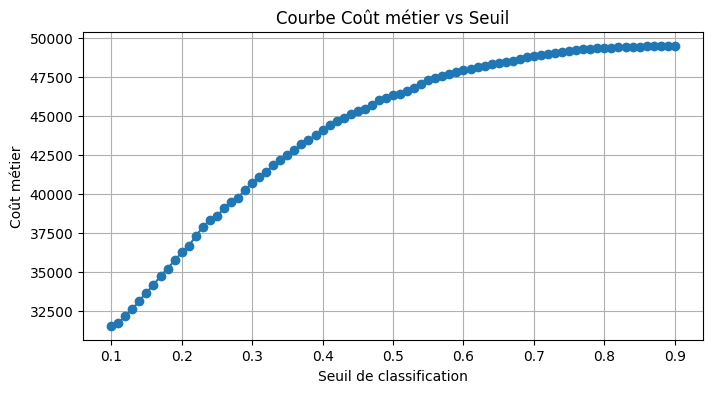

In [99]:
evaluate_model_with_cv_and_optuna(
    model_class= XGBClassifier,
    model_name="XGBoost",
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    param_space=param_space_xgb,
    cv_splits=3  # Validation croisée rapide
)

In [19]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score,
    accuracy_score, confusion_matrix, classification_report
)
from xgboost import XGBClassifier
import optuna
import numpy as np
import matplotlib.pyplot as plt

# --------- Split des données ---------
X = train_final.drop(columns=["TARGET"])
y = train_final["TARGET"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --------- Fonctions utiles ---------
def compute_business_cost(y_true, y_pred, fn_cost=10, fp_cost=1):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return fn * fn_cost + fp * fp_cost

def find_best_threshold(y_true, y_probas, thresholds=np.linspace(0.1, 0.9, 81), fn_cost=10, fp_cost=1):
    best_threshold = 0.5
    lowest_cost = float("inf")
    cost_per_threshold = []

    for threshold in thresholds:
        y_pred = (y_probas >= threshold).astype(int)
        cost = compute_business_cost(y_true, y_pred, fn_cost, fp_cost)
        cost_per_threshold.append((threshold, cost))
        if cost < lowest_cost:
            best_threshold = threshold
            lowest_cost = cost

    return best_threshold, lowest_cost, cost_per_threshold

# --------- Définition de l'espace des hyperparamètres XGBoost ---------
param_space_xgb = {
    "n_estimators": ("int", 50, 150),
    "max_depth": ("int", 3, 6),
    "learning_rate": ("float", 0.01, 0.3),
    "subsample": ("float", 0.6, 1.0),
    "colsample_bytree": ("float", 0.6, 1.0),
    "gamma": ("float", 0.0, 5.0),
    "reg_lambda": ("float", 0.001, 10.0),
    "reg_alpha": ("float", 0.001, 10.0),
}

# --------- Optimisation avec Optuna ---------
def objective(trial):
    params = {
        key: (
            trial.suggest_int(key, *space[1:]) if space[0] == "int"
            else trial.suggest_float(key, *space[1:]) if space[0] == "float"
            else trial.suggest_categorical(key, space)
        )
        for key, space in param_space_xgb.items()
    }

    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', **params)
    y_val_proba = cross_val_predict(
        model,
        X_train,
        y_train,
        cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
        method='predict_proba',
        n_jobs=-1
    )[:, 1]

    y_val_pred = (y_val_proba >= 0.5).astype(int)
    return compute_business_cost(y_train, y_val_pred)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)
best_params = study.best_params

# --------- Entraînement et évaluation finale ---------
best_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', **best_params)
best_model.fit(X_train, y_train)

y_test_proba = best_model.predict_proba(X_test)[:, 1]
best_threshold, cost, cost_curve = find_best_threshold(y_test, y_test_proba)
y_test_pred = (y_test_proba >= best_threshold).astype(int)

# --------- Résultats ---------
print(f"Meilleur seuil trouvé : {best_threshold:.2f}")
print(f"Coût métier total : {cost}")
print("\nRapport de classification :\n")
print(classification_report(y_test, y_test_pred, digits=3))


[I 2025-08-19 14:09:44,313] A new study created in memory with name: no-name-7eb4fdb7-e7c5-47a3-880c-72635c66083d
[I 2025-08-19 14:10:12,739] Trial 0 finished with value: 194013.0 and parameters: {'n_estimators': 83, 'max_depth': 6, 'learning_rate': 0.11214443614737651, 'subsample': 0.9917462790034658, 'colsample_bytree': 0.96708710103461, 'gamma': 1.9177303930499097, 'reg_lambda': 6.12917734338276, 'reg_alpha': 8.90868800377356}. Best is trial 0 with value: 194013.0.
[I 2025-08-19 14:10:41,385] Trial 1 finished with value: 193914.0 and parameters: {'n_estimators': 129, 'max_depth': 4, 'learning_rate': 0.10655701194576236, 'subsample': 0.8005889295332234, 'colsample_bytree': 0.884958332747305, 'gamma': 4.3446110129179685, 'reg_lambda': 8.97474832224419, 'reg_alpha': 1.5351059474928082}. Best is trial 1 with value: 193914.0.
[I 2025-08-19 14:11:10,997] Trial 2 finished with value: 196242.0 and parameters: {'n_estimators': 127, 'max_depth': 4, 'learning_rate': 0.06486763289614819, 'subsa

Meilleur seuil trouvé : 0.10
Coût métier total : 33031

Rapport de classification :

              precision    recall  f1-score   support

           0      0.954     0.797     0.869     56554
           1      0.196     0.565     0.291      4949

    accuracy                          0.778     61503
   macro avg      0.575     0.681     0.580     61503
weighted avg      0.893     0.778     0.822     61503

